In [0]:
## run the following command and upload 'kaggle.json' file to access kaggle.

# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [0]:
# dataset download from kaggle api
!pip install -q kaggle

# to hide api from others
!chmod 600 /root/.kaggle/kaggle.json

In [21]:
# Downloading Kaggle dataset using api
# Historical stock data for DIJA 30 companies (2006-01-01 to 2018-01-01)
!kaggle datasets download -d/--unzip szrlee/stock-time-series-20050101-to-20171231
# Hourly weather data for 30 US & Canadian Cities + 6 Israeli Cities/
!kaggle datasets download -d selfishgene/historical-hourly-weather-data

stock-time-series-20050101-to-20171231.zip: Skipping, found more recently modified local copy (use --force to force download)
historical-hourly-weather-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
#unzipping downloaded datasets
!unzip stock-time-series-20050101-to-20171231.zip
!unzip historical-hourly-weather-data.zip

Archive:  stock-time-series-20050101-to-20171231.zip
replace AMZN_2006-01-01_to_2018-01-01.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace MSFT_2006-01-01_to_2018-01-01.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: MSFT_2006-01-01_to_2018-01-01.csv  
  inflating: AXP_2006-01-01_to_2018-01-01.csv  
  inflating: GOOGL_2006-01-01_to_2018-01-01.csv  
  inflating: INTC_2006-01-01_to_2018-01-01.csv  
  inflating: PG_2006-01-01_to_2018-01-01.csv  
  inflating: GE_2006-01-01_to_2018-01-01.csv  
  inflating: MMM_2006-01-01_to_2018-01-01.csv  
  inflating: HD_2006-01-01_to_2018-01-01.csv  
  inflating: DIS_2006-01-01_to_2018-01-01.csv  
  inflating: CAT_2006-01-01_to_2018-01-01.csv  
  inflating: JPM_2006-01-01_to_2018-01-01.csv  
  inflating: NKE_2006-01-01_to_2018-01-01.csv  
  inflating: UTX_2006-01-01_to_2018-01-01.csv  
  inflating: GS_2006-01-01_to_2018-01-01.csv  
  inflating: CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: UNH_2006-01-01_to_2018-01-01.csv  
  inflating:

In [35]:
# Importing required libraries for analysis
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Visualization
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.tools import FigureFactory as ff

# Statistics
import statsmodels.api as sm
from numpy.random import normal,seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error as msq

In [37]:
!ls

AABA_2006-01-01_to_2018-01-01.csv
AAPL_2006-01-01_to_2018-01-01.csv
all_stocks_2006-01-01_to_2018-01-01.csv
all_stocks_2017-01-01_to_2018-01-01.csv
AMZN_2006-01-01_to_2018-01-01.csv
AXP_2006-01-01_to_2018-01-01.csv
BA_2006-01-01_to_2018-01-01.csv
CAT_2006-01-01_to_2018-01-01.csv
city_attributes.csv
CSCO_2006-01-01_to_2018-01-01.csv
CVX_2006-01-01_to_2018-01-01.csv
DIS_2006-01-01_to_2018-01-01.csv
GE_2006-01-01_to_2018-01-01.csv
GOOGL_2006-01-01_to_2018-01-01.csv
GS_2006-01-01_to_2018-01-01.csv
HD_2006-01-01_to_2018-01-01.csv
historical-hourly-weather-data.zip
humidity.csv
IBM_2006-01-01_to_2018-01-01.csv
INTC_2006-01-01_to_2018-01-01.csv
JNJ_2006-01-01_to_2018-01-01.csv
JPM_2006-01-01_to_2018-01-01.csv
kaggle.json
KO_2006-01-01_to_2018-01-01.csv
MCD_2006-01-01_to_2018-01-01.csv
MMM_2006-01-01_to_2018-01-01.csv
MRK_2006-01-01_to_2018-01-01.csv
MSFT_2006-01-01_to_2018-01-01.csv
NKE_2006-01-01_to_2018-01-01.csv
PFE_2006-01-01_to_2018-01-01.csv
PG_2006-01-01_to_2018-01-01.csv
pressure.csv


## Data being used:
 - Google Stocks Data
 - Microsoft Stocks Data
 - Humidity In Different World Cities
 - Pressure In Different World Cities

In [0]:
google = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
microsoft = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
humidity = pd.read_csv('humidity.csv', index_col='datetime', parse_dates=['datetime'])
pressure = pd.read_csv('pressure.csv', index_col='datetime', parse_dates=['datetime'])

In [0]:
## Checking for NaNs

# humidity.isna().any()
# pressure.isna().any()
# google.isna().any()
# microsoft.isna().any()

## Data Preprocessing - Removing NaNs from the weather data (Here Humidity and Pressure files)

In [0]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method = 'ffill')
# Same method applies for Pressure as the data belongs to a seasonal catagory
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method = 'ffill')

## Data Visualization

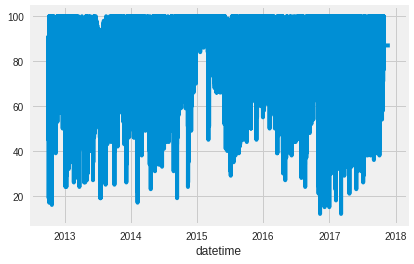

In [63]:
humidity.Vancouver.plot()
# humidity.head()